<a href="https://colab.research.google.com/github/ajitkumarkp/ML/blob/master/YOLO_Training_Ambulance_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code to save to google driver

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


In [8]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/YOLO/ 
%ls

/content/drive/My Drive/Colab Notebooks/YOLO
class.names        OID-data.zip               yolov3-ambulance-setup.data
darknet53.conv.74  resulting_data.gsheet      yolov3-ambulance-test.cfg
data_test.txt      train_log.txt              yolov3-ambulance-train.cfg
data_train.txt     yolov3-ambulance-code.zip


## Download darknet source

In [0]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13069 (delta 0), reused 3 (delta 0), pack-reused 13057
Receiving objects: 100% (13069/13069), 11.80 MiB | 6.58 MiB/s, done.
Resolving deltas: 100% (8922/8922), done.
Checking out files: 100% (1991/1991), done.


In [0]:
%cd darknet

/content/drive/My Drive/darknet


In [0]:
!pwd

/content/drive/My Drive/darknet


## Compile Darknet source

In [0]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

print("Building. . . It might take 2-3 minutes")

!make &> build_log.txt

Building. . . It might take 2-3 minutes


In [0]:
!pwd


/content/drive/My Drive/darknet


## Download the dataset:
* Contains Images and their normalized(0-1) annotations 
* Bonding box has- class x/W y/H w/W h/H
* x,y is the BB center, w,h-BB width, height, W,H-Image Width and Heigth 
* eg: 0 0.5078125 0.530833 0.9143749999999999 0.605

In [0]:
!wget "https://www.dropbox.com/s/84jr6gxlvrw3azy/OID-data.zip?dl=1" -O OID-data.zip
!unzip OID-data.zip &> /dev/null

--2020-04-17 19:46:10--  https://www.dropbox.com/s/84jr6gxlvrw3azy/OID-data.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/84jr6gxlvrw3azy/OID-data.zip [following]
--2020-04-17 19:46:10--  https://www.dropbox.com/s/dl/84jr6gxlvrw3azy/OID-data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc568f80622dd080e44694c9052e.dl.dropboxusercontent.com/cd/0/get/A2CpbUVsq-EjZIUomLE2SoMz85-za4cIQf34qDBaKrDRGh3_jGkhrj3IOZ_YdymesyPA7iLwpv2lSRNsD-72MoesHuP5eNHiBHI-u66tucQhiVoZgq0E-xSLHZEzpBMaamw/file?dl=1# [following]
--2020-04-17 19:46:11--  https://uc568f80622dd080e44694c9052e.dl.dropboxusercontent.com/cd/0/get/A2CpbUVsq-EjZIUomLE2SoMz85-za4cIQf34qDBaKrDRGh3_jGkhrj3IOZ_YdymesyPA7iLwpv2lSRNsD-72MoesHuP5eNHiBHI-u66tucQhi

## Split the dataset into 80/20- Training/Test
* Create 2 txt files with locations of test/Training imgs 

In [0]:
import random
import os
import subprocess
import sys

image_dir = "./OID-data"
f_val = open("data_test.txt", 'w')
f_train = open("data_train.txt", 'w')

path, dirs, files = next(os.walk(image_dir))
data_size = len(files)

ind = 0
data_test_size = int(0.2 * data_size)
test_array = random.sample(range(data_size), k=data_test_size)

for f in os.listdir(image_dir):
    if(f.split(".")[-1] == "jpg"):
        ind += 1
        
        if ind in test_array:
            f_val.write(image_dir+'/'+f+'\n')
        else:
            f_train.write(image_dir+'/'+f+'\n')

f_train.close()
f_val.close()

## Download yolov3-ambulance-code.zip which contains:
* class.names
    * Ambulance             
* yolov3-ambulance-test.cfg  
* yolov3-ambulance-train.cfg  
    * batch=64
    * subdivisions=16
    * width=416
    * height=416
    * channels=3
    * momentum=0.9
    * decay=0.0005
    * angle=0
    * saturation = 1.5
    etc.....
* yolov3-ambulance-setup.data 
    * classes= 1
    * train  = data_train.txt
    * valid = data_test.txt
    * names = class.names
    * backup = backup/ 

In [0]:
!wget "https://www.dropbox.com/sh/jfyj1wetf28bgpr/AACGJHIlPyKRO70B9DlAVqWPa?dl=1" -O yolov3-ambulance-code.zip
!unzip yolov3-ambulance-code.zip

--2020-04-17 19:48:36--  https://www.dropbox.com/sh/jfyj1wetf28bgpr/AACGJHIlPyKRO70B9DlAVqWPa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/jfyj1wetf28bgpr/AACGJHIlPyKRO70B9DlAVqWPa [following]
--2020-04-17 19:48:36--  https://www.dropbox.com/sh/dl/jfyj1wetf28bgpr/AACGJHIlPyKRO70B9DlAVqWPa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc52bcfc8c661dc17b979f132d47.dl.dropboxusercontent.com/zip_download_get/AZYvICvcYXrvg66CFvQPcfIc-TkX9jSWqhWwYbWrshc9SuJob2FEsj7corgwAhnEKB3miffS_URCeEgeJBLtHe33t7N9cuq4QErEEeBpKvBLlA?dl=1 [following]
--2020-04-17 19:48:37--  https://uc52bcfc8c661dc17b979f132d47.dl.dropboxusercontent.com/zip_download_get/AZYvICvcYXrvg66CFvQPcfIc-TkX9jSWqhWwYbWrshc9SuJob2FEsj7corgwAhnEKB3miffS_URCeE

## Download pre-trained weights(from ImageNet) to start with default weights for training YOLO.

In [0]:
!wget "https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1" -O darknet53.conv.74

--2020-04-17 19:49:48--  https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/18dwbfth7prbf0h/darknet53.conv.74 [following]
--2020-04-17 19:49:48--  https://www.dropbox.com/s/dl/18dwbfth7prbf0h/darknet53.conv.74
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7041c8b21dcdcca1fdeb610984.dl.dropboxusercontent.com/cd/0/get/A2Cz4s_7iXDGpuz0Mh6TaZ-iWrk-bH3mBU3bijTgxKL2pczNt5EbDdBICAYfoFloCcvx5h2LoEhzQ-t38Gvo-fAgajMzReWRRo1fWVLg--sQRKFJ_P_4lkfv3cJuIkrQCI4/file?dl=1# [following]
--2020-04-17 19:49:49--  https://uc7041c8b21dcdcca1fdeb610984.dl.dropboxusercontent.com/cd/0/get/A2Cz4s_7iXDGpuz0Mh6TaZ-iWrk-bH3mBU3bijTgxKL2pczNt5EbDdBICAYfoFloCcvx5h2LoEhzQ-t38Gvo-fAgajMzRe

In [0]:
!pwd

/content/drive/My Drive/darknet


## YOLO Training (takes ~3hrs)
* Once training is done the output wieghts are in ./backup/

In [0]:
!./darknet detector train yolov3-ambulance-setup.data yolov3-ambulance-train.cfg ./darknet53.conv.74 -dont_show -map 2> train_log.txt

Streaming output truncated to the last 5000 lines.

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 61.22 %, best = 61.22 % 
 125: 0.523235, 0.650766 avg loss, 0.001000 rate, 8.242065 seconds, 8000 images, 2.217411 hours left
Loaded: 0.000089 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 61.22 %, best = 61.22 % 
 126: 0.635928, 0.649282 avg loss, 0.001000 rate, 8.267968 seconds, 8064 images, 2.215270 hours left
Loaded: 0.000078 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 61.22 %, best = 61.22 % 
 127: 0.500578, 0.634412 avg loss, 0.001000 rate, 8.231746 seconds, 8128 images, 2.213190 hours left
Loaded: 0.000069 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 61.22 %, best = 61.22 % 
 128: 0.492365, 0.620207 avg loss, 0.001000 rate, 8.235059 seconds, 8192 images, 2.211021 hours left
Loaded: 0.000066 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 

## Pre-trained weights (Optional)

In [0]:
!wget "https://www.dropbox.com/s/qeno1qc1habd03d/yolov3-ambulance_last.weights?dl=1" -O yolov3-ambulance.weights

--2020-04-17 22:33:07--  https://www.dropbox.com/s/qeno1qc1habd03d/yolov3-ambulance_last.weights?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/qeno1qc1habd03d/yolov3-ambulance_last.weights [following]
--2020-04-17 22:33:07--  https://www.dropbox.com/s/dl/qeno1qc1habd03d/yolov3-ambulance_last.weights
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4dba35d00d0ae2063a780eeccd.dl.dropboxusercontent.com/cd/0/get/A2DAOV0tnD_gLEuGd_KKXl5nmp3LazpZeud04JxmJA6rGYnYy8ZcpRA3w8UYvsxlFKlHbLnZBjVVTbDWVBvmCoG4ckdQDaelCqEKakLRh0pH-XIcdrMfkRBDydgg5eTRgxY/file?dl=1# [following]
--2020-04-17 22:33:07--  https://uc4dba35d00d0ae2063a780eeccd.dl.dropboxusercontent.com/cd/0/get/A2DAOV0tnD_gLEuGd_KKXl5nmp3LazpZeud04JxmJA6rGYnYy8ZcpRA3w8

## Finally Inference

In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

In [0]:
!wget "https://www.dropbox.com/s/aad0pw7pf4ygs4b/traffic_1.jpg?dl=1" -O test1.jpg

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 64 K-images (1 Kilo-batches_64) 
test1.jpg: Predicted in 45.817000 milli-seconds.
Ambulance: 91%


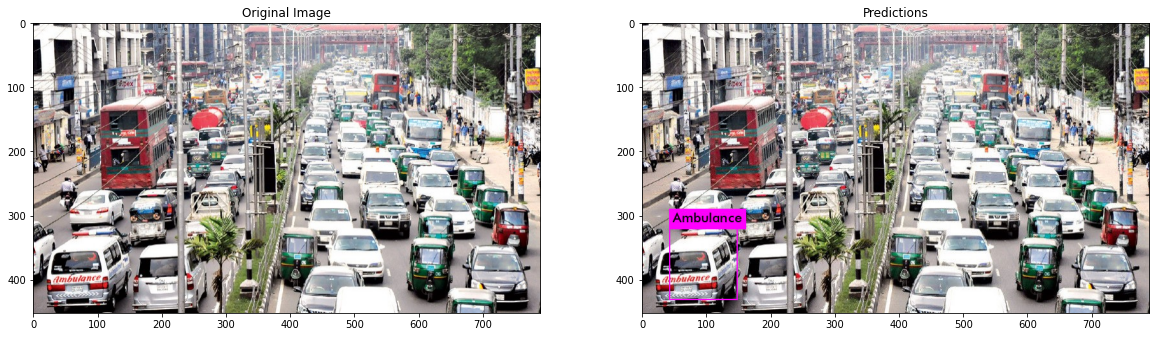

In [0]:
# Using the wieghts from my training. Available in backup/ 
!./darknet detector test yolov3-ambulance-setup.data yolov3-ambulance-test.cfg backup/yolov3-ambulance-train_best.weights test1.jpg -thresh .6 2> /dev/null
display_output("test1.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 32 K-images (0 Kilo-batches_64) 
test1.jpg: Predicted in 45.702000 milli-seconds.
Ambulance: 75%


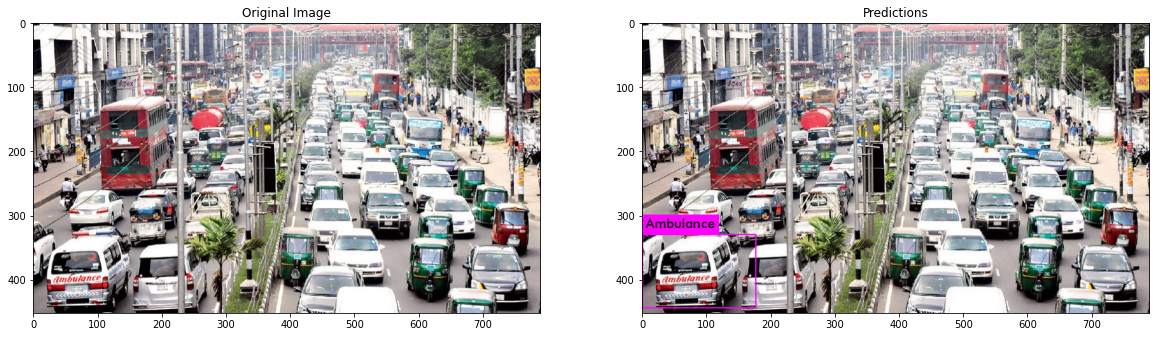

In [0]:
# Using pre-trained weights 
!./darknet detector test yolov3-ambulance-setup.data yolov3-ambulance-test.cfg yolov3-ambulance.weights test1.jpg -thresh .6 2> /dev/null
display_output("test1.jpg")

In [0]:
!wget https://d1muy2ct2wkbaz.cloudfront.net/video/259000/258637/580x325/0.jpg -O test2.jpg

--2020-04-17 22:44:33--  https://d1muy2ct2wkbaz.cloudfront.net/video/259000/258637/580x325/0.jpg
Resolving d1muy2ct2wkbaz.cloudfront.net (d1muy2ct2wkbaz.cloudfront.net)... 54.192.86.206, 54.192.86.157, 54.192.86.82, ...
Connecting to d1muy2ct2wkbaz.cloudfront.net (d1muy2ct2wkbaz.cloudfront.net)|54.192.86.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31241 (31K) [image/jpeg]
Saving to: ‘test2.jpg’

test2.jpg           100%[===================>]  30.51K  --.-KB/s    in 0.02s   

2020-04-17 22:44:34 (1.37 MB/s) - ‘test2.jpg’ saved [31241/31241]



net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 64 K-images (1 Kilo-batches_64) 
test2.jpg: Predicted in 45.866000 milli-seconds.
Ambulance: 99%


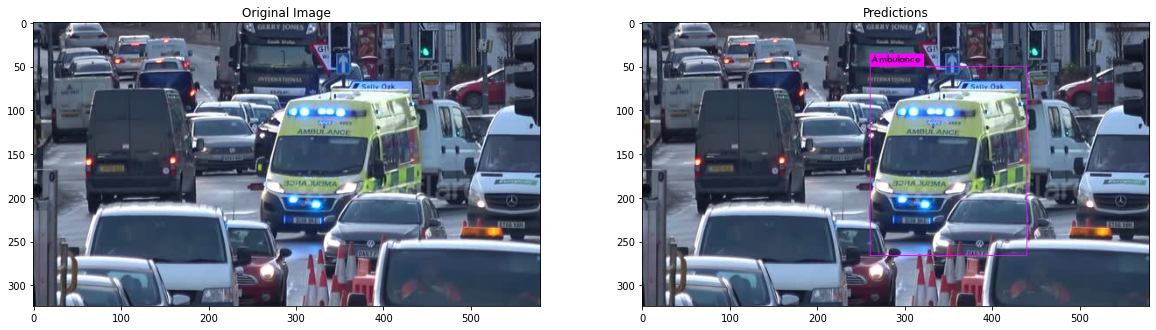

In [0]:
!./darknet detector test yolov3-ambulance-setup.data yolov3-ambulance-test.cfg backup/yolov3-ambulance-train_best.weights test2.jpg -thresh .6  2> /dev/null
display_output("test2.jpg")

In [0]:
!wget https://www.straitstimes.com/sites/default/files/styles/article_pictrure_780x520_/public/articles/2020/01/18/ST_20200118_AMBULANCE_5390028.jpg -O test3.jpg

--2020-04-17 22:49:17--  https://www.straitstimes.com/sites/default/files/styles/article_pictrure_780x520_/public/articles/2020/01/18/ST_20200118_AMBULANCE_5390028.jpg
Resolving www.straitstimes.com (www.straitstimes.com)... 152.195.53.15
Connecting to www.straitstimes.com (www.straitstimes.com)|152.195.53.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102238 (100K) [image/jpeg]
Saving to: ‘test3.jpg’

test3.jpg           100%[===================>]  99.84K  --.-KB/s    in 0.009s  

2020-04-17 22:49:17 (11.3 MB/s) - ‘test3.jpg’ saved [102238/102238]



net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 64 K-images (1 Kilo-batches_64) 
test3.jpg: Predicted in 45.915000 milli-seconds.
Ambulance: 100%
Ambulance: 100%
Ambulance: 100%


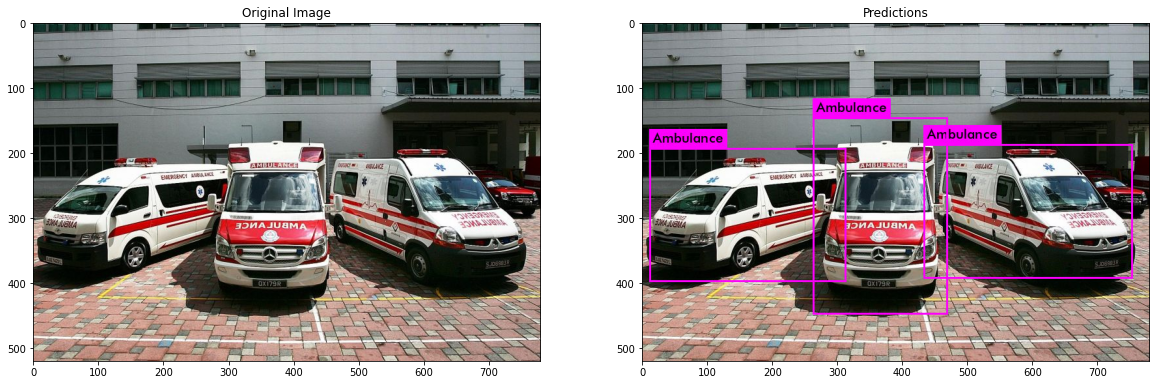

In [0]:
!./darknet detector test yolov3-ambulance-setup.data yolov3-ambulance-test.cfg backup/yolov3-ambulance-train_best.weights test3.jpg -thresh .6  2> /dev/null
display_output("test3.jpg")

In [0]:
!wget https://www.zhl.org.in/blog/wp-content/uploads/2019/09/Ambulance-Service.jpg -O test4.jpg

--2020-04-17 22:49:31--  https://www.zhl.org.in/blog/wp-content/uploads/2019/09/Ambulance-Service.jpg
Resolving www.zhl.org.in (www.zhl.org.in)... 13.232.106.231
Connecting to www.zhl.org.in (www.zhl.org.in)|13.232.106.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294313 (287K) [image/jpeg]
Saving to: ‘test4.jpg’

test4.jpg           100%[===================>] 287.42K   292KB/s    in 1.0s    

2020-04-17 22:49:33 (292 KB/s) - ‘test4.jpg’ saved [294313/294313]



net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 64 K-images (1 Kilo-batches_64) 
test4.jpg: Predicted in 45.921000 milli-seconds.
Ambulance: 100%
Ambulance: 72%


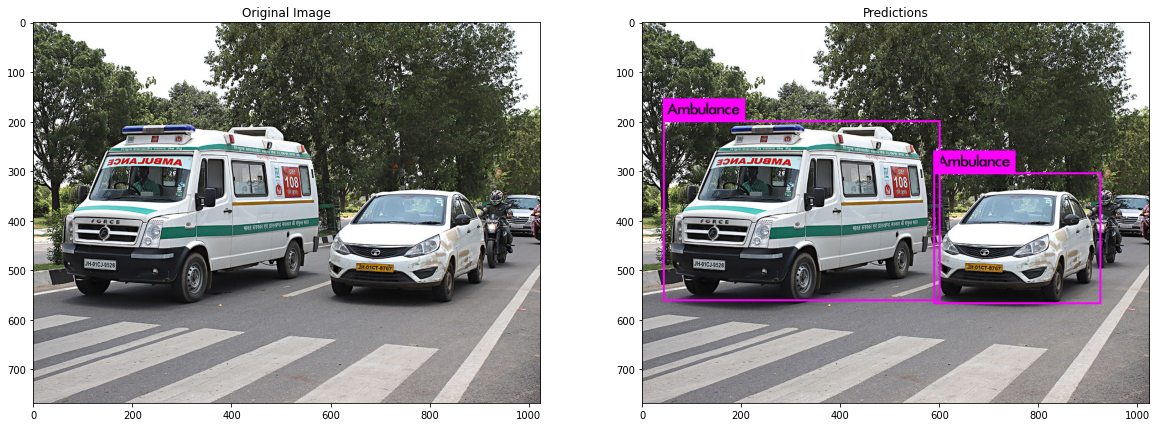

In [0]:
!./darknet detector test yolov3-ambulance-setup.data yolov3-ambulance-test.cfg backup/yolov3-ambulance-train_best.weights test4.jpg -thresh .6 2> /dev/null
display_output("test4.jpg")